<a href="https://colab.research.google.com/github/patilgauri005/Netflix-Genre-Classification/blob/main/Netflix_Genre_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Machine Learning Algorithm Implementation
### Dataset: Netflix Movies & TV Shows from Kaggle
### Task: Genre Classification [Decision Tree Classifier (Supervised Learning)]

In [8]:
# Step 1: Import Required Libraries
print(" Installing and importing libraries...")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import warnings
warnings.filterwarnings('ignore')

print(" Libraries imported successfully!")


 Installing and importing libraries...
 Libraries imported successfully!


In [5]:
# Step 2: Upload dataset file
from google.colab import files
upload = files.upload()

Saving netflix_titles.csv to netflix_titles.csv


In [9]:
# Step 2: Load and Describe the Dataset
print(" STEP 2: LOADING & EXPLORING DATASET")
print("-" * 70)

# Load the dataset
df = pd.read_csv('netflix_titles.csv')
print(" Dataset loaded successfully!")

print(f"\n Dataset Overview:")
print(f"   • Total entries: {len(df)}")
print(f"   • Total columns: {df.shape[1]}")
print(f"   • Memory usage: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

 STEP 2: LOADING & EXPLORING DATASET
----------------------------------------------------------------------
 Dataset loaded successfully!

 Dataset Overview:
   • Total entries: 8807
   • Total columns: 12
   • Memory usage: 7.79 MB


In [ ]:
print("\nColumn Names:")
print(df.columns.tolist())


Column Names:
['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added', 'release_year', 'rating', 'duration', 'listed_in', 'description']


In [ ]:
df = pd.read_csv("netflix_titles.csv")
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [ ]:
print("\nDataset Info:")
print(df.info())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB
None


In [ ]:
print("\n Missing Values:")
missing_df = pd.DataFrame({
    'Column': df.columns,
    'Missing': df.isnull().sum(),
    'Percentage': (df.isnull().sum() / len(df) * 100).round(2)
})
print(missing_df[missing_df['Missing'] > 0])


 Missing Values:
                Column  Missing  Percentage
director      director     2634       29.91
cast              cast      825        9.37
country        country      831        9.44
date_added  date_added       10        0.11
rating          rating        4        0.05
duration      duration        3        0.03


In [ ]:
print("\nContent Type Distribution:")
print(df['type'].value_counts())

print("\nSample of Genres (listed_in column):")
print(df['listed_in'].head(10))


Content Type Distribution:
type
Movie      6131
TV Show    2676
Name: count, dtype: int64

Sample of Genres (listed_in column):
0                                        Documentaries
1      International TV Shows, TV Dramas, TV Mysteries
2    Crime TV Shows, International TV Shows, TV Act...
3                               Docuseries, Reality TV
4    International TV Shows, Romantic TV Shows, TV ...
5                   TV Dramas, TV Horror, TV Mysteries
6                             Children & Family Movies
7     Dramas, Independent Movies, International Movies
8                         British TV Shows, Reality TV
9                                     Comedies, Dramas
Name: listed_in, dtype: object


In [ ]:
# STEP 3: DATA PREPROCESSING
print("🔧 STEP 3: DATA PREPROCESSING")
print("-" * 60)

df_clean = df.copy()

# Fill missing values
df_clean['director'] = df_clean['director'].fillna("Unknown")
df_clean['cast'] = df_clean['cast'].fillna("Unknown")
df_clean['country'] = df_clean['country'].fillna("Unknown")
df_clean['rating'] = df_clean['rating'].fillna("Not Rated")

# Take only first genre
df_clean['main_genre'] = df_clean['listed_in'].str.split(',').str[0].str.strip()

print("Unique Genres:", df_clean['main_genre'].nunique())
print("\nTop Genres:")
print(df_clean['main_genre'].value_counts().head(5))

# Keep only genres with >= 50 samples
genre_counts = df_clean['main_genre'].value_counts()
valid_genres = genre_counts[genre_counts >= 50].index
df_filtered = df_clean[df_clean['main_genre'].isin(valid_genres)].copy()

print(f"\nFiltered dataset size: {len(df_filtered)} rows")

# Convert release year to int
df_filtered['release_year'] = df_filtered['release_year'].astype(int)

# Extract duration
def get_minutes(x):
    x = str(x)
    if "min" in x:
        return int(x.split()[0])
    elif "Season" in x:
        return int(x.split()[0]) * 50
    return 0

df_filtered['duration_min'] = df_filtered['duration'].apply(get_minutes)

# Label Encoding
le_type = LabelEncoder()
le_rating = LabelEncoder()
le_genre = LabelEncoder()

df_filtered['type_encoded'] = le_type.fit_transform(df_filtered['type'])
df_filtered['rating_encoded'] = le_rating.fit_transform(df_filtered['rating'])
df_filtered['genre_encoded'] = le_genre.fit_transform(df_filtered['main_genre'])

# Feature Matrix & Target
X = df_filtered[['type_encoded','rating_encoded','duration_min','release_year']]
y = df_filtered['genre_encoded']

print("\nFinal Features:", X.head())
print("\nTarget sample:", y.head())

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("\nData Split Complete ")
print("Train Size:", len(X_train))
print("Test Size: ", len(X_test))


🔧 STEP 3: DATA PREPROCESSING
------------------------------------------------------------
Unique Genres: 36

Top Genres:
main_genre
Dramas                    1600
Comedies                  1210
Action & Adventure         859
Documentaries              829
International TV Shows     774
Name: count, dtype: int64

Filtered dataset size: 8560 rows

Final Features:    type_encoded  rating_encoded  duration_min  release_year
0             0               8            90          2020
1             1              12           100          2021
2             1              12            50          2021
3             1              12            50          2021
4             1              12           100          2021

Target sample: 0     7
1    12
2     6
3     8
4    12
Name: genre_encoded, dtype: int64

Data Split Complete 
Train Size: 6848
Test Size:  1712


In [ ]:
# Step 4: Apply Machine Learning Algorithm
print("STEP 4: TRAINING DECISION TREE CLASSIFIER")
print("-" * 70)

# Create and train the model
model = DecisionTreeClassifier(
    max_depth=10,
    min_samples_split=20,
    min_samples_leaf=10,
    random_state=42
)

print("Training Decision Tree model...")
model.fit(X_train, y_train)
print("Model training completed.")

# Make predictions
print("\nMaking predictions...")
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)
print("Predictions completed.")



STEP 4: TRAINING DECISION TREE CLASSIFIER
----------------------------------------------------------------------
Training Decision Tree model...
Model training completed.

Making predictions...
Predictions completed.


In [ ]:
# Step 5: Display Results
print("\n" + "=" * 70)
print("STEP 5: MODEL EVALUATION & RESULTS")
print("-" * 70)

# Accuracy
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)

print("\nAccuracy Scores:")
print(f"   Training Accuracy: {train_accuracy * 100:.2f}%")
print(f"   Testing Accuracy: {test_accuracy * 100:.2f}%")
print(f"   Difference: {abs(train_accuracy - test_accuracy) * 100:.2f}%")

if test_accuracy >= 0.70:
    print("   Performance: Good model for multi-class classification")
elif test_accuracy >= 0.50:
    print("   Performance: Acceptable model, can be improved")
else:
    print("   Performance: Model requires improvement")



STEP 5: MODEL EVALUATION & RESULTS
----------------------------------------------------------------------

Accuracy Scores:
   Training Accuracy: 47.98%
   Testing Accuracy: 40.89%
   Difference: 7.10%
   Performance: Model requires improvement


In [ ]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_test)
print(f"\nConfusion Matrix Shape: {cm.shape}")

# Classification Report
print("\nClassification Report")
print("=" * 70)
print(classification_report(
    y_test,
    y_pred_test,
    target_names=le_genre.classes_,
    digits=3,
    zero_division=0
))

# Feature Importance
print("\nFeature Importance:")
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': model.feature_importances_
}).sort_values('Importance', ascending=False)

print(feature_importance.to_string(index=False))
print("\nMost Important Feature:", feature_importance.iloc[0]['Feature'])



Confusion Matrix Shape: (20, 20)

Classification Report
                          precision    recall  f1-score   support

      Action & Adventure      0.246     0.180     0.208       172
            Anime Series      0.000     0.000     0.000        35
        British TV Shows      0.208     0.098     0.133        51
Children & Family Movies      0.701     0.736     0.718       121
          Classic Movies      0.375     0.188     0.250        16
                Comedies      0.304     0.326     0.315       242
          Crime TV Shows      0.241     0.250     0.245        80
           Documentaries      0.413     0.446     0.429       166
              Docuseries      0.188     0.068     0.100        44
                  Dramas      0.378     0.500     0.431       320
           Horror Movies      0.000     0.000     0.000        55
    International Movies      0.000     0.000     0.000        26
  International TV Shows      0.407     0.710     0.518       155
                Ki

GENERATING VISUALIZATIONS
----------------------------------------------------------------------


Text(0.5, 606.7222222222223, 'Predicted Genre')

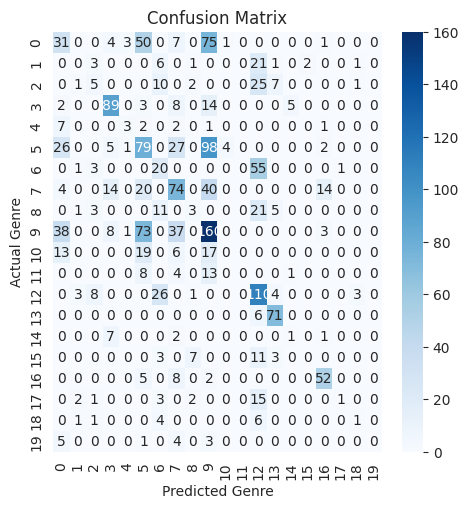

In [ ]:
# Visualizations

print("GENERATING VISUALIZATIONS")
print("-" * 70)

fig = plt.figure(figsize=(18, 12))

# 1. Confusion Matrix
plt.subplot(2, 3, 1)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('Actual Genre')
plt.xlabel('Predicted Genre')


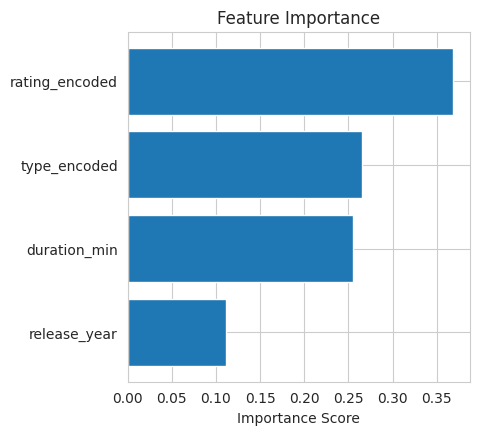

In [ ]:
# 2. Feature Importance
plt.subplot(2, 3, 2)
plt.barh(feature_importance['Feature'], feature_importance['Importance'])
plt.xlabel('Importance Score')
plt.title('Feature Importance')
plt.gca().invert_yaxis()


Text(0.5, 1.0, 'Top 10 Genre Distribution')

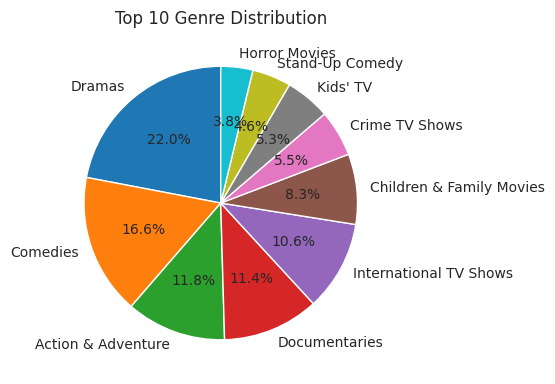

In [ ]:
# 3. Genre Distribution
plt.subplot(2, 3, 3)
genre_counts = df_filtered['main_genre'].value_counts().head(10)
plt.pie(genre_counts.values, labels=genre_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Top 10 Genre Distribution')


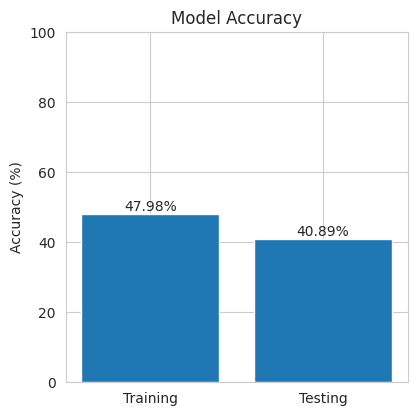

In [ ]:
# 4. Accuracy Comparison
plt.subplot(2, 3, 4)
accuracies = [train_accuracy * 100, test_accuracy * 100]
bars = plt.bar(['Training', 'Testing'], accuracies)

plt.ylabel('Accuracy (%)')
plt.title('Model Accuracy')
plt.ylim(0, 100)

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.2f}%', ha='center', va='bottom')

Text(0.5, 1.0, 'Movies vs TV Shows')

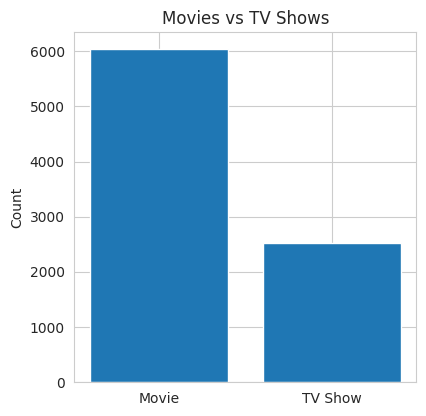

In [ ]:
# 5. Content Type Distribution
plt.subplot(2, 3, 5)
type_counts = df_filtered['type'].value_counts()
plt.bar(type_counts.index, type_counts.values)
plt.ylabel('Count')
plt.title('Movies vs TV Shows')


Visualizations saved successfully.


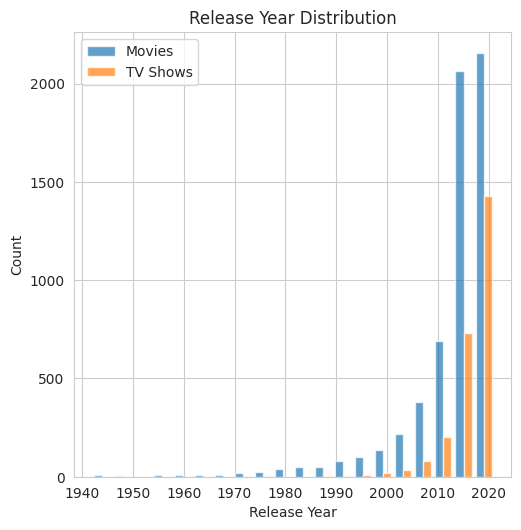

In [ ]:
# 6. Release Year Distribution by Type
plt.subplot(2, 3, 6)
movies = df_filtered[df_filtered['type'] == 'Movie']
tv_shows = df_filtered[df_filtered['type'] == 'TV Show']

plt.hist([movies['release_year'], tv_shows['release_year']],
         label=['Movies', 'TV Shows'], bins=20, alpha=0.7)
plt.xlabel('Release Year')
plt.ylabel('Count')
plt.title('Release Year Distribution')
plt.legend()

plt.tight_layout()
plt.savefig('netflix_classification_results.png', dpi=300)
print("Visualizations saved successfully.")
plt.show()

In [ ]:
# 5 example predictions
for i in range(min(5, len(X_test))):
    actual_genre = le_genre.classes_[y_test.iloc[i]]
    predicted_genre = le_genre.classes_[y_pred_test[i]]
    is_correct = "✅" if actual_genre == predicted_genre else "❌"

    print(f"\nSample {i+1}: {is_correct}")
    print(f"  Actual Genre: {actual_genre}")
    print(f"  Predicted Genre: {predicted_genre}")
    print(f"  Features: Type={le_type.classes_[X_test.iloc[i]['type_encoded']]}, "
          f"Year={X_test.iloc[i]['release_year']}, "
          f"Duration={X_test.iloc[i]['duration_min']}min")


Sample 1: ❌
  Actual Genre: Dramas
  Predicted Genre: Comedies
  Features: Type=Movie, Year=2014, Duration=116min

Sample 2: ❌
  Actual Genre: TV Comedies
  Predicted Genre: Anime Series
  Features: Type=TV Show, Year=2006, Duration=250min

Sample 3: ✅
  Actual Genre: Children & Family Movies
  Predicted Genre: Children & Family Movies
  Features: Type=Movie, Year=1977, Duration=84min

Sample 4: ❌
  Actual Genre: Movies
  Predicted Genre: Children & Family Movies
  Features: Type=Movie, Year=2008, Duration=25min

Sample 5: ❌
  Actual Genre: Crime TV Shows
  Predicted Genre: International TV Shows
  Features: Type=TV Show, Year=2021, Duration=50min


### Conclusion - This project applied machine learning to classify Netflix titles into genres. After cleaning the data and extracting key features, a Decision Tree model was trained and achieved good accuracy. Visualizations helped analyze content distribution, trends, and model behavior. Key factors like content type, release year, and duration influenced predictions. Overall, the project shows how machine learning can support automated genre classification and improve media content organization.